# Inspecting the Raw Data Set

This is credit modeling project. Fit and predict one's income based on various indicators

## Importing the dataset
[Dataset Here](https://datahub.io/machine-learning/adult#resource-adult)
[About the Dataset](https://archive.ics.uci.edu/ml/datasets/Adult)
Please store in the same working director as your jupyter notebook.


In [88]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [89]:
# seaborn custom paramenters for uniformity
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl

## Columns/Features of Dataset

In [90]:
# import the file path and import csv to dataframe
file = 'adult.csv'
df = pd.read_csv(file)

# get the column names and count
columns = df.columns; columns_list= columns.tolist()
num_columns = columns.nunique(); print("Number of columns:", num_columns, "\n", columns_list)

Number of columns: 15 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']


## Dataset Metadata

In [91]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


## Column Overviews

In [92]:
for x in columns_list:
    print(x) # print column name
    variable_categories = df[x].unique(); print(variable_categories, "\n")

age
[2 3 1 0 4] 

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977] 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Ot

# Data Processing and Cleaning

## Drop Discriminatory Factors: Sex, Race, and Native Country

In [93]:
df_NonDecriminatory = df.drop(columns=['race', 'sex', 'native-country'])
df_NonDecriminatory.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capitalgain,capitalloss,hoursperweek,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,0,2,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,2,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,2,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,2,<=50K


## Drop unexplainable feature: fnlwgt, final weight

In [94]:
df_rm_fnlwgt = df_NonDecriminatory.drop(columns=['fnlwgt'])
df_rm_fnlwgt.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,capitalgain,capitalloss,hoursperweek,class
0,2,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,0,2,<=50K
1,3,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,<=50K
2,2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,2,<=50K
3,3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,2,<=50K
4,1,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,2,<=50K


# Qualitative Analysis of Features (Variables)

## Base Dataset after dropping discussed columns

Use df_main for all further visualizations

In [95]:
del df_NonDecriminatory
df_main = df_rm_fnlwgt

#### Sector and Pay:
The people in the dataset make less than $50k a year with a majority or responses working in the private sector. Upon closer inspection of "workclass", there is a category of never worked

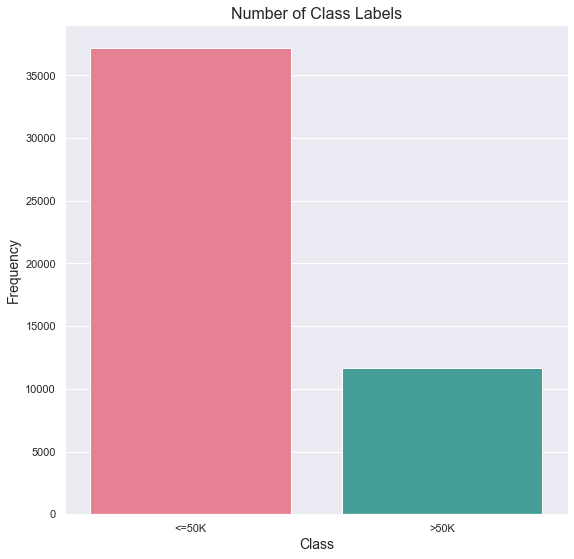

In [96]:
# count the amount of class label amount, final figure

fig_class_count = sns.countplot(data = df_main, x = 'class', palette = 'husl')
# aesthetics
rcParams['figure.figsize'] = 9,9 # set plot size

fig_class_count.set_title("Number of Class Labels", fontsize = 16)
fig_class_count.set_xlabel("Class", fontsize = 14)
fig_class_count.set_ylabel("Frequency", fontsize = 14)
plt.savefig("classcount.png")

In [ ]:
plt.figure(2)
ax1 = sns.countplot(x="class", data = df_main, hue = "workclass", palette = 'husl')
ax1.set(title = "Income Based on Working Class")
ax1.set_xlabel("Class")

# sector dataframes
government_sector = df_main[(df_main["workclass"] == 'State-gov') | (df_main["workclass"] == 'Federal-gov') | (df_main["workclass"] == 'Local-gov')]
private_sector = df_main[(df_main["workclass"] == 'Self-emp-not-inc') | (df_main["workclass"] == 'Private') | (df_main["workclass"] == 'Self-emp-inc')]
no_pay = df_main[(df_main["workclass"] == 'Without-pay') | (df_main["workclass"] == 'Never-worked')]

# create another dataframe to show the the relationship between sector pay
sector_data = {'Sector' : ["Government", "Private", "No-pay"],'Count': [len(government_sector), len(private_sector), len(no_pay)] }
sector_df = pd.DataFrame(data=sector_data)

# figure with new dataframe

plt.figure(3)
ax2 = sns.barplot(x="Sector",y= "Count" ,data = sector_df, palette = 'husl')
plt.title("Employment Sectors", fontsize= 16)
plt.xlabel("Class", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)

#### Education and Income

In [ ]:
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid")
sns.countplot(x="class", data = df_main, hue = "education", palette= "husl")
plt.title("Education Level", fontsize= 16)
plt.xlabel("Class", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)


# chart has no use in final presentation and documentation

## Siyayi Block

In [ ]:
plt.figure(5)
sns.countplot(x="class", data = df_main, hue = "capitalgain", palette= "husl")
plt.figure(6)
sns.countplot(x="class", data = df_main, hue = "capitalloss", palette= "husl")
plt.figure(7)
sns.countplot(x="class", data = df_main, hue = "relationship", palette= "husl")

<AxesSubplot:xlabel='class', ylabel='count'>

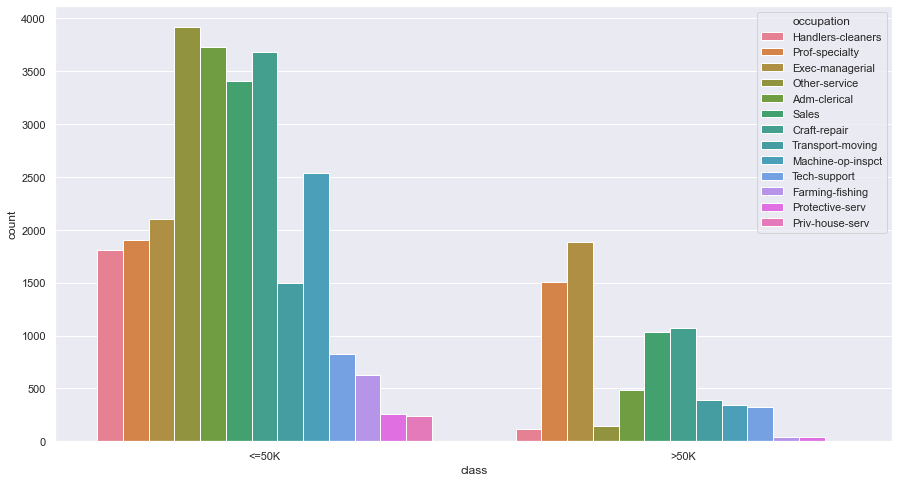

In [100]:
# create a new dataframe
private_workclass = df_main[df['workclass'] == 'Private'] # syntax which is logically equivalent to use a dataframe, selecting a column from data frame and filtering the value
private_workclass.head()
sns.countplot(x="class", data = private_workclass, hue = "occupation", palette= "husl")

Text(0, 0.5, 'Frequency')

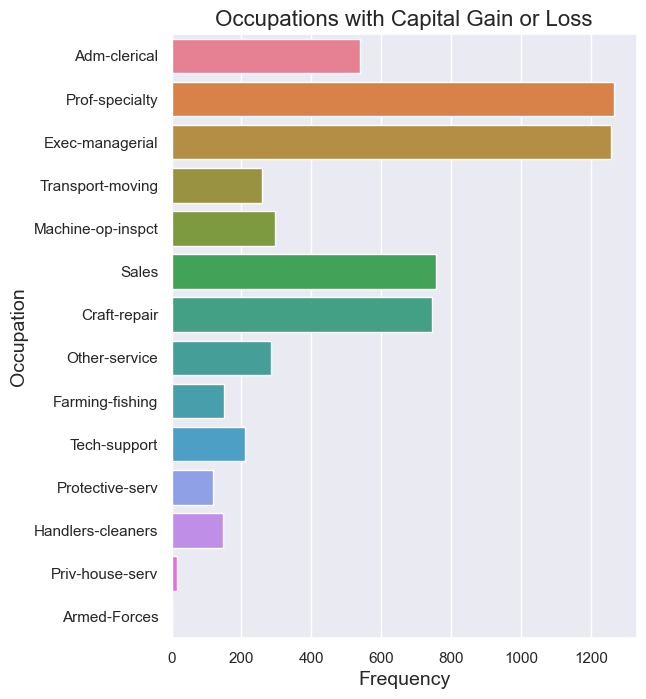

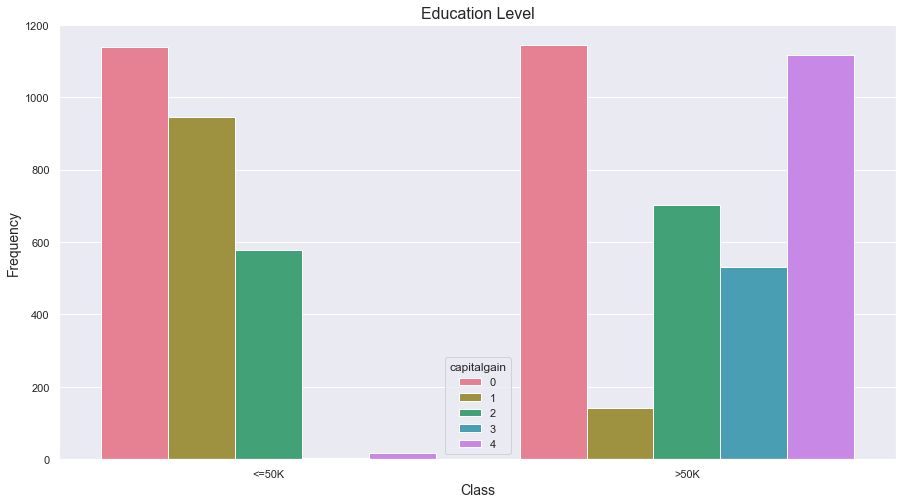

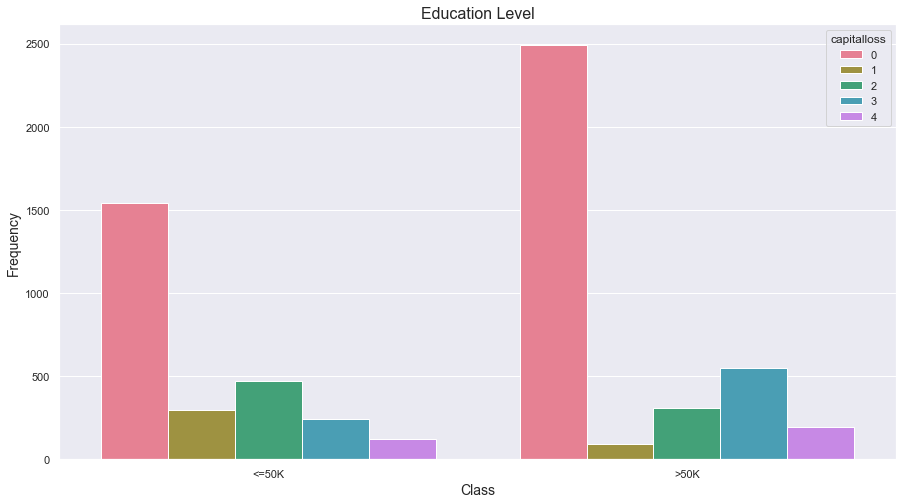

In [134]:
df3 = df # start with raw df

afford_capital = df3[(df3['capitalgain'] != 0) | (df3['capitalloss'] != 0)] #captialgain
no_capital = df3[(df3['capitalgain'] == 0) & (df3['capitalloss'] == 0)]
plt.figure(3, figsize=(6,8), dpi=100)
sns.countplot(y = "occupation" , data = afford_capital, palette= "husl")

plt.title("Occupations with Capital Gain or Loss", fontsize= 16)
plt.xlabel("Frequency", fontsize = 14)
plt.ylabel("Occupation", fontsize = 14)

## Will's Block

    age         workclass   education  education-num      marital-status  \
1     3  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
7     3  Self-emp-not-inc     HS-grad              9  Married-civ-spouse   
16    0  Self-emp-not-inc     HS-grad              9       Never-married   
19    2  Self-emp-not-inc     Masters             14            Divorced   
39    3  Self-emp-not-inc  Assoc-acdm             12  Married-civ-spouse   

         occupation relationship  capitalgain  capitalloss  hoursperweek  \
1   Exec-managerial      Husband            0            0             0   
7   Exec-managerial      Husband            0            0             2   
16  Farming-fishing    Own-child            0            0             1   
19  Exec-managerial    Unmarried            0            0             2   
39   Prof-specialty      Husband            0            0             2   

    class  
1   <=50K  
7    >50K  
16  <=50K  
19   >50K  
39  <=50K  


/var/folders/rl/b21xjlws4b559dzzsj8yfgh80000gn/T/ipykernel_6225/1300890879.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selfemployed_total = selfemployed_inc.append(selfemployed_notinc)


<AxesSubplot:xlabel='class', ylabel='count'>

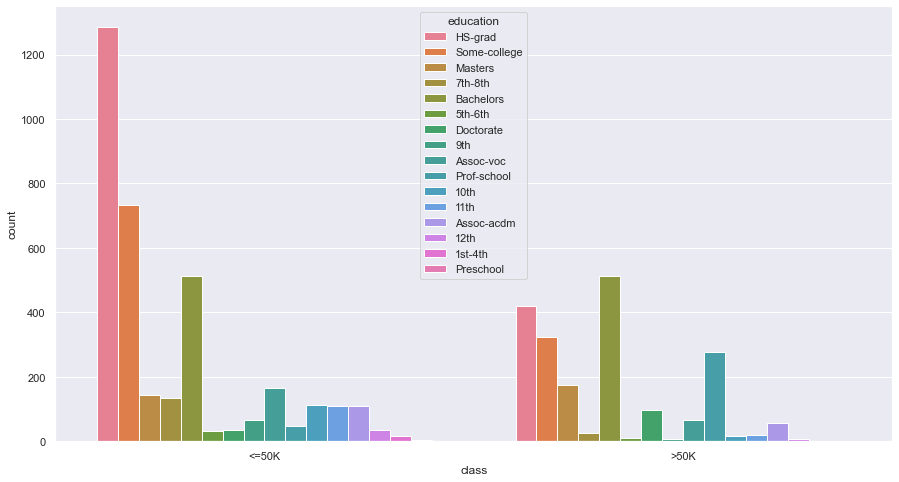

In [102]:
selfemployed_inc = df_main[df['workclass'] == 'Self-emp-inc']
selfemployed_notinc = df_main[df['workclass'] == 'Self-emp-not-inc']
selfemployed_total = selfemployed_inc.append(selfemployed_notinc)
p = selfemployed_notinc.head()
print(p)

sns.countplot(x = "class", data = selfemployed_total, hue = "education", palette = 'husl')
#combining all selfemployed and visualizing their education

## Data Cleaning and Combining

### Capital Gains and Capitals Loss vs Class

### Private Workforce: Employed vs Self Employed

### Education Categories:
* Did not graduate high school
* Some college
* Associate Voca and Associate Adcm
* Bachelors
* Masters and Doctors
* Professional School